<a href="https://colab.research.google.com/github/qedir314/ML-Projects/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout, Input, Add, AveragePooling2D, Concatenate
from tensorflow.keras import Sequential

In [ ]:
def conv_block(inputs,f1, k1, f2, k2, f3, k3, strides=[1,1,1]):
  x = Conv2D(filters=f1, kernel_size=k1,strides = strides[0], activation="relu", kernel_initializer="he_normal")(inputs)
  x = Conv2D(filters=f2, kernel_size=k2,strides = strides[1], activation="relu", kernel_initializer="he_normal", padding="same")(x)
  x = Conv2D(filters=f3, kernel_size=k3,strides = strides[2], activation="relu", kernel_initializer="he_normal")(x)

  return x

In [ ]:
tf.keras.backend.clear_session()

inputs  = Input(shape=(224, 224, 3))
layer_0 = Conv2D(filters=64, kernel_size=7, strides=2, activation="relu", kernel_initializer="he_normal")(inputs)
max_pool_0 = MaxPool2D(3, strides=2)(layer_0)      #add

max_pool_0_proj = Conv2D(256, 1, padding="same")(max_pool_0)

###########   Stage 1

conv_0 = conv_block(max_pool_0, 64, 1, 64, 3, 256, 1)
added_0 = Add()([conv_0, max_pool_0_proj])
conv_1 = conv_block(added_0, 64, 1, 64, 3, 256, 1)
added_1 = Add()([added_0, conv_1])
conv_2 = conv_block(added_1, 64, 1, 64, 3, 256, 1)
added_2 = Add()([added_1, conv_2])

added_2_proj = Conv2D(512, 1, strides=1, padding='same')(added_2)

#########    Stage 2

conv_3 = conv_block(added_2, 128, 1, 128, 3, 512, 1, strides=[1,1,1])
added_3 = Add()([conv_3, added_2_proj])
conv_4 = conv_block(added_3, 128, 1, 128, 3, 512, 1)
added_4 = Add()([conv_4,added_3])
conv_5 = conv_block(added_4, 128, 1, 128, 3, 512, 1)
added_5 = Add()([conv_5, added_4])
conv_6 = conv_block(added_5, 128, 1, 128, 3, 512, 1)
added_6 = Add()([conv_6, added_5])

added_6_proj = Conv2D(1024, 1, padding="same")(added_6)
########### Stage 3

conv_7 = conv_block(added_6, 256, 1, 256, 3, 1024, 1, strides=[1,1,1])
added_7 = Add()([conv_7, added_6_proj ])
conv_8 = conv_block(added_7, 256, 1, 256, 3, 1024, 1)
added_8 = Add()([conv_8, added_7])
conv_9 = conv_block(added_8, 256, 1, 256, 3, 1024, 1)
added_9 = Add()([conv_9, added_8])
conv_10 = conv_block(added_9, 256, 1, 256, 3, 1024, 1)
added_10 = Add()([conv_10, added_9])
conv_11 = conv_block(added_10, 256, 1, 256, 3, 1024, 1)
added_11 = Add()([conv_11, added_10])
conv_12 = conv_block(added_11, 256, 1, 256, 3, 1024, 1)
added_12 = Add()([conv_12, added_11])


added_12_proj = Conv2D(2048, 1, padding="same")(added_12)
######## Stage 4

conv_13 = conv_block(added_12, 512, 1, 512, 3, 2048, 1, strides=[1, 1, 1])
added_13 = Add()([conv_13, added_12_proj])
conv_14 = conv_block(added_13, 512, 1, 512, 3, 2048, 1)
added_14 = Add()([conv_14, added_13])
conv_15 = conv_block(added_14, 512, 1, 512, 3, 2048, 1)
added_15 = Add()([conv_15, added_14])

##### Final

avg_pool = AveragePooling2D(2)(added_15)
flatten = Flatten()(avg_pool)
output_layer = Dense(1, activation="sigmoid")(flatten)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs = [output_layer])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 109, 109, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 54, 54, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 54, 54, 256)    │         16,640 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 54, 54, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 54, 54, 256)    │              0 │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 54, 54, 64)     │         16,448 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 54, 54, 64)     │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 54, 54, 256)    │         16,640 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 54, 54, 256)    │              0 │ add[0][0],             │
│                           │                        │                │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 54, 54, 64)     │         16,448 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 54, 54, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 54, 54, 256)    │         16,640 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 54, 54, 256)    │              0 │ add_1[0][0],           │
│                           │                        │                │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 54, 54, 128)    │         32,896 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)   

 Total params: 24,974,465 (95.27 MB)

 Trainable params: 24,974,465 (95.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!kaggle datasets download -d ashishjangra27/gender-recognition-200k-images-celeba

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/gender-recognition-200k-images-celeba
License(s): CC-BY-NC-SA-4.0
100% 1.32G/1.32G [00:14<00:00, 173MB/s]
100% 1.32G/1.32G [00:14<00:00, 99.1MB/s]


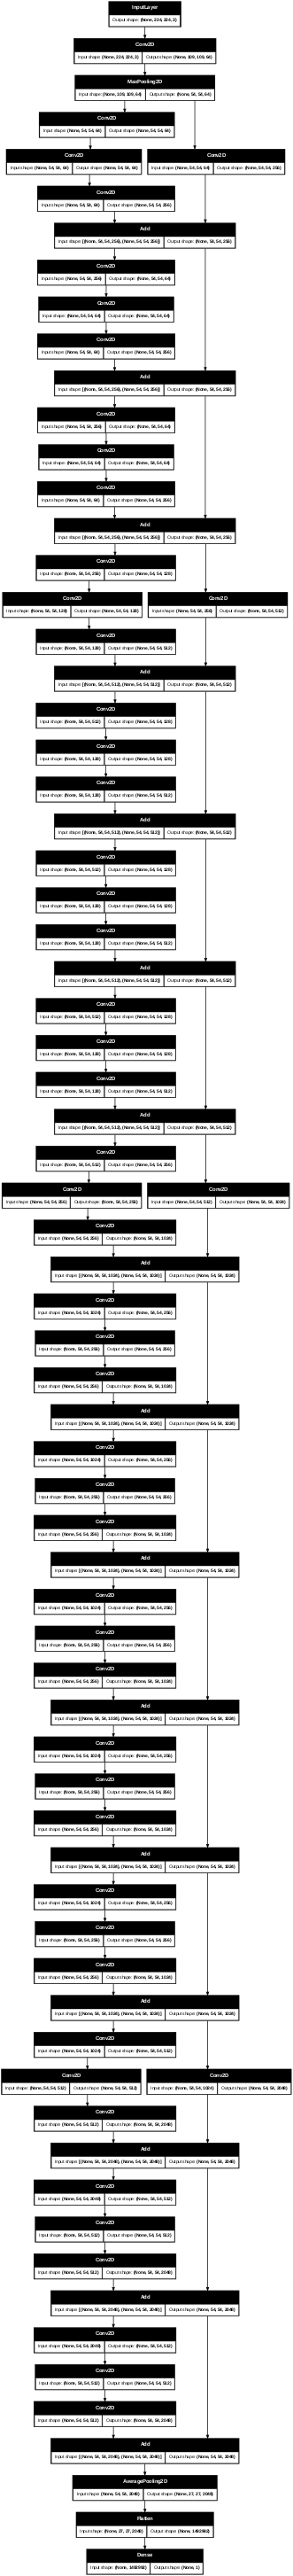

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=25)

In [ ]:
!unzip '/content/gender-recognition-200k-images-celeba.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Male/189674.jpg  
  inflating: Dataset/Validation/Male/189675.jpg  
  inflating: Dataset/Validation/Male/189676.jpg  
  inflating: Dataset/Validation/Male/189679.jpg  
  inflating: Dataset/Validation/Male/189681.jpg  
  inflating: Dataset/Validation/Male/189684.jpg  
  inflating: Dataset/Validation/Male/189688.jpg  
  inflating: Dataset/Validation/Male/189689.jpg  
  inflating: Dataset/Validation/Male/189691.jpg  
  inflating: Dataset/Validation/Male/189692.jpg  
  inflating: Dataset/Validation/Male/189693.jpg  
  inflating: Dataset/Validation/Male/189694.jpg  
  inflating: Dataset/Validation/Male/189695.jpg  
  inflating: Dataset/Validation/Male/189696.jpg  
  inflating: Dataset/Validation/Male/189697.jpg  
  inflating: Dataset/Validation/Male/189698.jpg  
  inflating: Dataset/Validation/Male/189702.jpg  
  inflating: Dataset/Validation/Male/189704.jpg  
  inflating: Dataset/Validation/Male/189705.jpg  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_dir = '/content/Dataset/Train'
valid_dir = '/content/Dataset/Validation'
test_dir = '/content/Dataset/Test'

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")
valid_data = train_datagen.flow_from_directory(valid_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                                class_mode="binary")
test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(train_data, epochs=5, validation_data=(valid_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  49/5000 ━━━━━━━━━━━━━━━━━━━━ 3:47:27 3s/step - accuracy: 0.5246 - loss: 615468.5000

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-9db44e921b0c>", line 1, in <cell line: 1>
    model.fit(train_data, epochs=5, validation_data=(valid_data))
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/te

TypeError: object of type 'NoneType' has no len()